<a id="top"></a>
<a href="https://nbviewer.jupyter.org/github/hufe09/pydata_practice/blob/master/data_visualization/data_visualization.ipynb">Jupyter Notebook</a>

# Python可视化

<a id="Matplotlib"></a>
# [Matplotlib绘图](https://matplotlib.org/index.html)

matplotlib.pyplot是一组命令样式函数，使matplotlib像MATLAB一样工作。每个pyplot函数都会对图形进行一些更改：例如，创建图形，在图形中创建绘图区域，在绘图区域中绘制一些线条，使用标签装饰图形等。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Matplotlib Logo

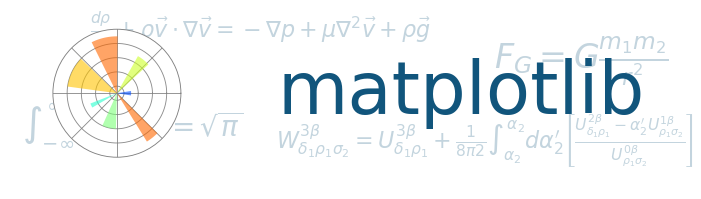

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.edgecolor'] = 'gray'

axalpha = 0.05
figcolor = 'white'
dpi = 80
fig = plt.figure(figsize=(8, 2), dpi=dpi)
fig.set_edgecolor(figcolor)
fig.set_facecolor(figcolor)


def add_math_background():
    ax = fig.add_axes([0., 0., 1., 1.])

    text = []
    text.append((r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = "
                 r"U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2}"
                 r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 "
                 r"\left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - "
                 r"\alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} "
                 r"}{U^{0\beta}_{\rho_1 \sigma_2}}\right]$", (0.7, 0.2), 20))
    text.append((r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} "
                 r"= -\nabla p + \mu\nabla^2 \vec{v} + \rho \vec{g}$",
                 (0.35, 0.9), 20))
    text.append(
        (r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$", (0.15, 0.3), 25))
    text.append((r"$F_G = G\frac{m_1m_2}{r^2}$", (0.85, 0.7), 30))
    for eq, (x, y), size in text:
        ax.text(x,
                y,
                eq,
                ha='center',
                va='center',
                color="#11557c",
                alpha=0.25,
                transform=ax.transAxes,
                fontsize=size)
    ax.set_axis_off()
    return ax


def add_matplotlib_text(ax):
    ax.text(0.95,
            0.5,
            'matplotlib',
            color='#11557c',
            fontsize=65,
            ha='right',
            va='center',
            alpha=1.0,
            transform=ax.transAxes)


def add_polar_bar():
    ax = fig.add_axes([0.025, 0.075, 0.2, 0.85], projection='polar')

    ax.set_alpha(axalpha)
    ax.set_axisbelow(True)
    N = 7
    arc = 2. * np.pi
    theta = np.arange(0.0, arc, arc / N)
    radii = 10 * np.array([0.2, 0.6, 0.8, 0.7, 0.4, 0.5, 0.8])
    width = np.pi / 4 * np.array([0.4, 0.4, 0.6, 0.8, 0.2, 0.5, 0.3])
    bars = ax.bar(theta, radii, width=width, bottom=0.0)
    for r, bar in zip(radii, bars):
        bar.set_facecolor(cm.jet(r / 10.))
        bar.set_alpha(0.6)

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(False)

    for line in ax.get_ygridlines() + ax.get_xgridlines():
        line.set_lw(0.8)
        line.set_alpha(0.9)
        line.set_ls('-')
        line.set_color('0.5')

    ax.set_yticks(np.arange(1, 9, 2))
    ax.set_rmax(9)


if __name__ == '__main__':
    main_axes = add_math_background()
    add_polar_bar()
    add_matplotlib_text(main_axes)
    plt.savefig('matplotlib_logo.png',
                facecolor='w',
                edgecolor='w',
                transparent=True,
                dpi=400,
                bbox_inches='tight')
    plt.show()

## Matplotlib Anatomy

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.b29k1n43i57.png)
[图片来源](https://matplotlib.org/examples/showcase/anatomy.html)

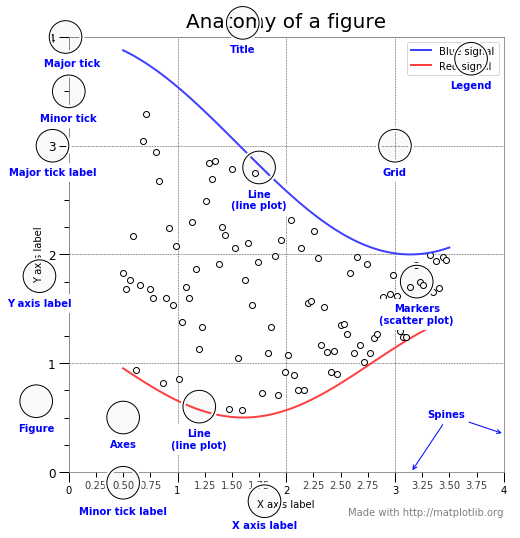

In [3]:
# This figure shows the name of several matplotlib elements composing a figure
# showcase example code: anatomy.py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x


ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X,
        Y3,
        linewidth=0,
        marker='o',
        markerfacecolor='w',
        markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y),
                    radius,
                    clip_on=False,
                    zorder=10,
                    linewidth=1,
                    edgecolor='black',
                    facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x,
            y,
            text,
            backgroundcolor="white",
            ha='center',
            va='top',
            weight='bold',
            color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines',
            xy=(4.0, 0.35),
            xycoords='data',
            xytext=(3.3, 0.5),
            textcoords='data',
            weight='bold',
            color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('',
            xy=(3.15, 0.0),
            xycoords='data',
            xytext=(3.45, 0.45),
            textcoords='data',
            weight='bold',
            color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0,
        -0.4,
        "Made with http://matplotlib.org",
        fontsize=10,
        ha="right",
        color='.5')

plt.savefig('matplotlib_anatomy.jpg', dpi=400)
plt.show()

## 图形中文显示
Matplotlib 默认情况不支持中文，我们可以使用以下简单的方法来解决：
- 首先下载字体 msyh.ttf(微软雅黑)
- 使用matplotlib.font_manager.FontProperties

In [4]:
def get_font(url, file_path):
    import requests
    r = requests.get(url)
    print("Download: " + file_path)
    with open(file_path, "wb") as f:
        f.write(r.content)
        f.close()
    return file_path


url = "https://github.com/hufe09/pydata_practice/raw/master/fonts/msyh.ttf"
file_path = "../fonts/msyh.ttf"
# font = FontProperties(fname=get_font(url, file_path),
#                       size=12)  # 指定文字,用来正常显示中文标签

/opt/conda/lib/python3.7/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


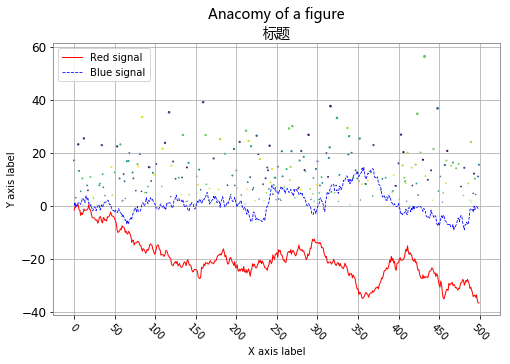

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# fname 为 你下载的字体库msyh.ttf 字体的路径
font = FontProperties(fname='../fonts/msyh.ttf', size=12)  # 指定文字,用来正常显示中文标签

data = {
    'a': np.arange(500),
    'c': np.random.randint(0, 500, 500),
    'd': np.random.randn(500)
}
data['b'] = data['d'] * np.random.randint(0, 50, 1)

plt.figure(figsize=[8, 5])
plt.plot(np.random.randn(500).cumsum(), 'r', linewidth=1)
plt.plot(np.random.randn(500).cumsum(), 'b--', linewidth=0.8)
plt.scatter('a', 'b', c='c', s='d', data=data)  #c为彩色, s为气泡大小
plt.title('Anacomy of a figure\n标题', FontProperties=font, fontsize=14)
plt.xticks([x for x in range(0, 550, 50)], rotation=-45)
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.grid(True)
plt.legend(['Red signal', 'Blue signal'], loc='best')
plt.show()

## 用关键字字符串绘图

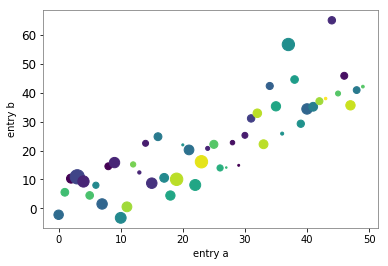

In [6]:
data = {
    'a': np.arange(50),
    'c': np.random.randint(0, 50, 50),
    'd': np.random.randn(50)
}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)  #c为彩色, s为气泡大小
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

## 用分类变量绘图

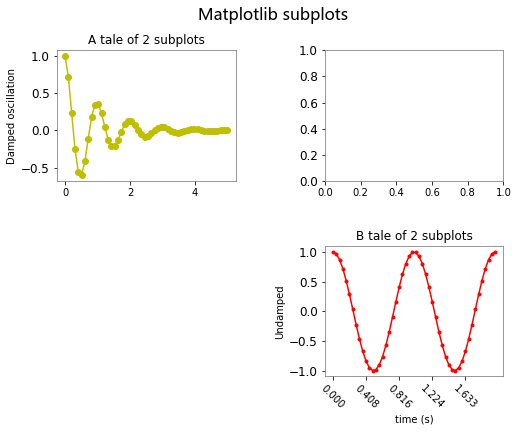

In [7]:
"""
Simple demo with multiple subplots.
"""
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0.0, 5.0)  #生成一个一维的array,linspace(起始点,结束点,点数(默认为50))
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.figure(figsize=[8, 6])
plt.suptitle('Matplotlib subplots', FontProperties=font, fontsize=16)
plt.subplots_adjust(left=None,
                    bottom=None,
                    right=None,
                    top=None,
                    wspace=0.5,
                    hspace=0.5)

plt.subplot(2, 2, 1)  #表示在subplot为2*1的样式,并在第一个子图上画出;
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 2, 2)  #  我们在第二个子图上加个空图哈,去理解它的图的排序(即注意第二个子图的位置
#  为第一行第二列)是按行优先的,这个正好和matlab里相反哦;

plt.subplot(2, 2, 4)
plt.title('B tale of 2 subplots')
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.xticks(x2[::10], rotation=-45)
plt.ylabel('Undamped')

plt.show()

## 图片与子图

### Figure
Matplotlib所绘制的图位于Figure对象中。plt.figure生成一个新的图片。
### Axes
这就是你认为的“一个图”，它是图像中有数据空间的区域。给定的图形可以包含多个轴，但是给定的轴对象只能在一个Figure中。轴包含两个(或三个，在3D的情况下)轴对象(注意轴和轴之间的区别)，它们负责数据限制(数据限制也可以通过set_xlim()和set_ylim()轴方法进行设置来控制)。每个轴都有一个标题(通过set_title()设置)、一个x标签(通过set_xlabel())和一个y标签(通过set_ylabel())设置)。

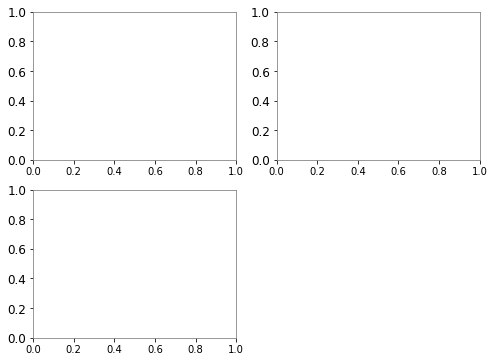

In [8]:
fig = plt.figure(figsize=[8, 6])
axes1 = fig.add_subplot(221)
axes2 = fig.add_subplot(222)
axes3 = fig.add_subplot(223)

In [9]:
axes1.hist(np.random.randn(100), bins=20, color='b', alpha=0.3)

(array([ 3.,  2.,  4.,  2.,  9.,  8.,  7.,  9.,  4.,  5.,  6., 13.,  5.,
         9.,  6.,  3.,  1.,  3.,  0.,  1.]),
 array([-1.86652231, -1.65555252, -1.44458272, -1.23361293, -1.02264314,
        -0.81167334, -0.60070355, -0.38973376, -0.17876396,  0.03220583,
         0.24317562,  0.45414541,  0.66511521,  0.876085  ,  1.08705479,
         1.29802459,  1.50899438,  1.71996417,  1.93093397,  2.14190376,
         2.35287355]),
 <a list of 20 Patch objects>)

In [10]:
axes2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [11]:
axes3.plot(np.random.randn(30).cumsum(), 'ro--')

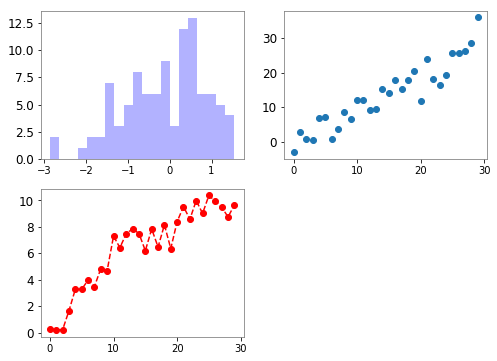

In [12]:
fig = plt.figure(figsize=[8, 6])
axes1 = fig.add_subplot(221)
axes1.hist(np.random.randn(100), bins=20, color='b', alpha=0.3)
axes2 = fig.add_subplot(222)
axes2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
axes3 = fig.add_subplot(223)
axes3.plot(np.random.randn(30).cumsum(), 'ro--')
plt.show()

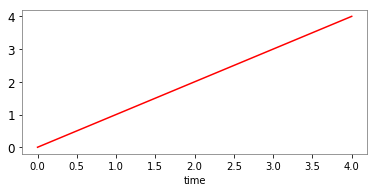

In [13]:
fig = plt.figure(1)  # 创建了一个figure对象;

#figure对象的add_axes()可以在其中创建一个axes对象,
# add_axes()的参数为一个形如[left, bottom, width, height]的列表,取值范围在0与1之间;
axes = fig.add_axes(
    [0.1, 0.5, 0.8,
     0.5])  # 我们把它放在了figure图形的上半部分，对应参数分别为：left, bottom, width, height;
axes.set_xlabel('time')  #用axes对象的set_xlabel函数来设置它的xlabel

line = axes.plot(range(5))[0]  #用axes对象的plot()进行绘图,它返回一个Line2D的对象;
line.set_color('r')  # 再调用Line2D的对象的set_color函数设置color的属性;
plt.show()

### plt.subplots添加子图

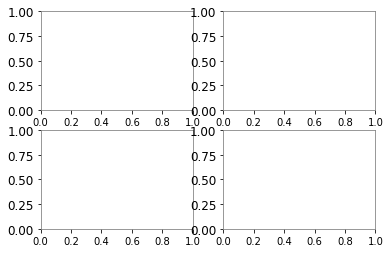

In [14]:
fig, axes = plt.subplots(2, 2)
plt.show()

``` Python
plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, **fig_kw)
#作用:创建一个已有subplots的figures;
参数:
      *nrows* : int  ,指创建的sublots的行数,默认为1.

      *ncols* : int  ,指创建的sublots的列数,默认为1.

      *sharex* : 为一个string或bool类型;
        当为Ture时,所有的subpots将要共享x轴,如果它们是上下的关系的话,上面的图的刻度label就没有,只有下面那个图的.
        If a string must be one of "row", "col", "all", or "none".
        "all" has the same effect as *True*, "none" has the same effect
        as *False*.
        If "row", each subplot row will share a X axis.
        If "col", each subplot column will share a X axis and the x tick
        labels on all but the last row will have visible set to *False*.

      *sharey* : 同上

      *squeeze* : bool  它是用来控制返回值的,根据返回的axis的结果决定要不要把没有的维度进行压缩一下.
           当为Ture时,如果返回的axis只有一个,则表示成标量,如果有一行或一列,则表示为一维数组,如果多行多列,则表示为2D数组;
           当为False时,不管多少个返回的axis,都以二维数组的方式返回;
      *subplot_kw* : dict
        Dict with keywords passed to the
        :meth:`~matplotlib.figure.Figure.add_subplot` call used to
        create each subplots.

      *fig_kw* : dict
        Dict with keywords passed to the :func:`figure` call.  Note that all
        keywords not recognized above will be automatically included here.

  返回值

  有两个fig和 axt(它是元组的方式哦)

      - *fig* is the :class:`matplotlib.figure.Figure` object

      - *ax* can be either a single axis object or an array of axis
        objects if more than one subplot was created.  The dimensions
        of the resulting array can be controlled with the squeeze
        keyword, see above.
```

### plt.subplots选项
- nrows = 2 子图行数
- ncols=2 子图列数
     - nrows = 2,ncols = 2表示将画布分割为2行2列，并起始值都为0，当调用画布中的坐标轴时，axes[0,0]表示调用坐上角的，axes[1,1]表示调用右下角的；
- figsize=[8,6] 用于生成图片尺寸的元组或列表
- sharex=True 共享x轴
- sharey=True 共享y轴
    - 可选的参数：True，False，row，col，默认值均为False，表示画布中的四个ax是相互独立的；
- subplots_adjust 调整子图间距
- subplot_kw 传入add_subplot的关键字参数字典，用于生成子图
- **fig_kw 额外关键字参数，例如：`plt.subplots(2,2,figsize=[8, 6])`

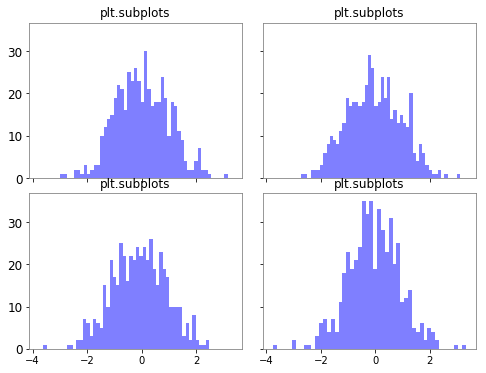

In [15]:
fig, axes = plt.subplots(nrows=2,
                         ncols=2,
                         sharex=True,
                         sharey=True,
                         subplot_kw={'title': 'plt.subplots'},
                         figsize=[8, 6])
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='b', alpha=0.5)
plt.subplots_adjust(left=None,
                    bottom=None,
                    right=None,
                    top=None,
                    wspace=0.1,
                    hspace=0.1)
plt.show()

## 颜色、标记和线类型

**color**
- `'b'`    blue
- `'g'`    green
- `'r'`    red
- `'c'`    cyan
- `'m'`    magenta
- `'y'`    yellow
- `'k'`    black
- `'w'`    white

**marker**
-  `'.'`    point marker
-  `','`    pixel marker
-  `'o'`    circle marker
-  `'v'`    triangle_down marker
-  `'^'`    triangle_up marker
-  `'<'`    triangle_left marker
-  `'>'`    triangle_right marker
-  `'1'`    tri_down marker
-  `'2'`    tri_up marker
-  `'3'`    tri_left marker
-  `'4'`    tri_right marker
-  `'s'`    square marker
-  `'p'`    pentagon marker
-  `'*'`    star marker
-  `'h'`    hexagon1 marker
-  `'H'`    hexagon2 marker
-  `'+'`    plus marker
-  `'x'`    x marker
-  `'D'`    diamond marker
-  `'d'`    thin_diamond marker
-  `'|'`    vline marker
-  `'_'`    hline marker

`numpy.cumsum(a, axis=None, dtype=None, out=None)`  
        Return the cumulative sum of the elements along a given axis.  
        返回给定轴上元素的累积总和。

In [16]:
list = np.array(range(10))
list

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
list.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

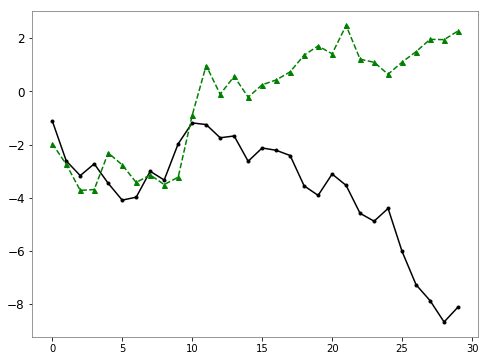

In [18]:
plt.figure(figsize=[8, 6])
plt.plot(np.random.randn(30).cumsum(), 'ko-', markersize=3)
plt.plot(np.random.randn(30).cumsum(),
         color='g',
         linestyle='dashed',
         marker='^',
         markersize=5)

## 刻度、标签和图例

- ax.set_title 设置标题
- ax.set_xticks  在数据范围内设定x轴刻度位置
- ax.set_xticklabels  为标签赋值
- ax.set_xlabel 设置x轴名称
- ax.set(**props) 批量设置绘图属性
- ax.legend(loc='best')
- ax.grid() 展示轴网格，默认打开

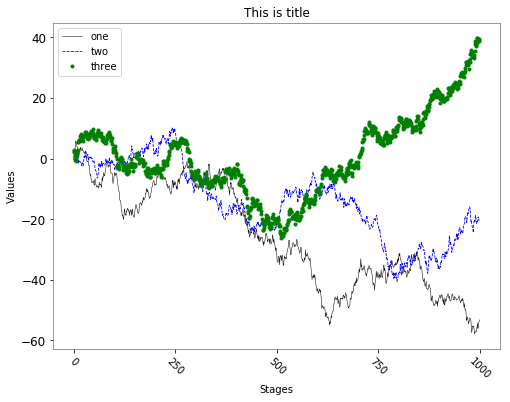

In [19]:
fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', linewidth=0.5)
ax.plot(np.random.randn(1000).cumsum(), 'b--', linewidth=0.8)
ax.plot(np.random.randn(1000).cumsum(), 'g.', linewidth=1)
ax.set_title('This is title')
# ax.set_xticks([x for x in range(0, 1250, 250)])
plt.xticks([x for x in range(0, 1250, 250)], rotation=-45)
ax.set_xlabel('Stages')
props = {'ylabel': 'Values'}
ax.set(**props)
ax.grid(False)
ax.legend(['one', 'two', 'three'], loc='best')

## 注释与子图加工

- ax.set_xlim(['1/1/2007', '1/1/2011']) 手动设置图表边界
- ax.text(x, y, s, fontdict=None, withdash=False, **kwargs) 添加注释和文本
    - x,y：注释的坐标位置（标量） 
    - 注释的内容（字符串） 
    - fontdict：重新设置注释内容的文本格式，包括字体颜色、背景大小和颜色、字体大小等（字典） 
    - widthdash：创建一个替代注释内容“s”的对象，参照英文单词解释，这应该是一个破折号 
    - **kwargs包括
- annotate(s, xy, xytext, *args, **kwargs) 
    - s: 箭尾的注释 
    - xy: 箭头坐标 
    - xytext : 箭尾坐标 
    - arrowprops：设置箭头标致的格式(字典)

- ax.arrow(x, y, dx, dy, hold=None, **kwargs) 添加注释和文本
    - x,y：箭头起点坐标 
    - dx,dy：箭头终点到起到的距离 
    - hold：未解 
    - **kwargs
- 中文支持不是很好，需要自己定义字体
    - `from matplotlib.font_manager import FontProperties`
    - `font = FontProperties(fname='../fonts/msyh.ttf', size=12)` 

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis\n2008-2009金融危机中的重要日期')

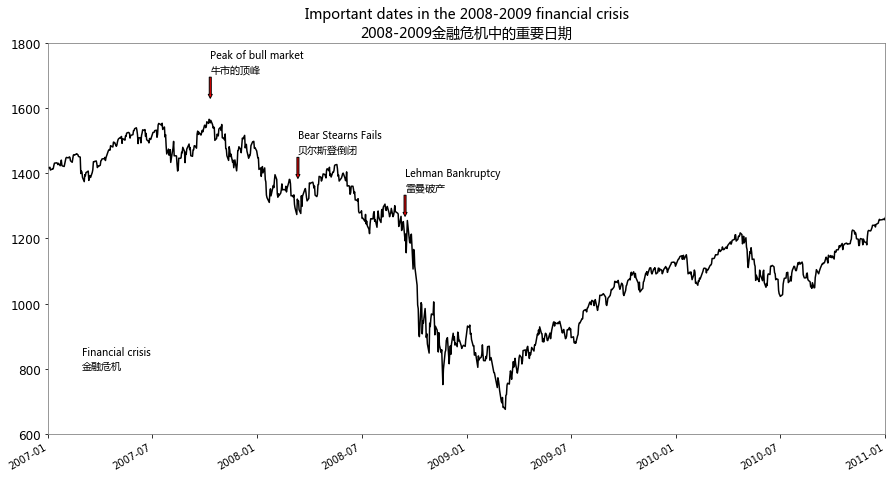

In [20]:
from datetime import datetime
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='../fonts/msyh.ttf', size=12)

fig = plt.figure(figsize=[15, 8])
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('datasets/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market\n牛市的顶峰'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails\n贝尔斯登倒闭'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy\n雷曼破产')]

for date, label in crisis_data:
    ax.annotate(label,
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(
                    facecolor='red',
                    headwidth=4,
                    width=2,
                    headlength=4,
                ),
                horizontalalignment='left',
                verticalalignment='top',
                FontProperties=font,
                fontsize=10)

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.text(datetime(2007, 3, 1),
        800,
        'Financial crisis\n金融危机',
        FontProperties=font,
        fontsize=10)
ax.set_title(
    'Important dates in the 2008-2009 financial crisis\n2008-2009金融危机中的重要日期',
    FontProperties=font,
    fontsize=14)

In [21]:
spx.asof(datetime(2007, 10, 11))

1554.41

## 常见图形

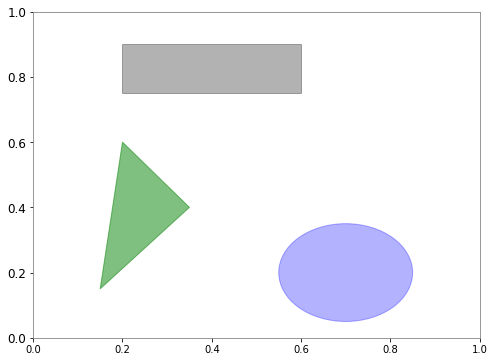

In [22]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g',
                   alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 保存图片
`plt.savefig`
选项
- fname 文件路径或Python文件型对象的字符串(PNG的.png)
- dpi 每英寸点数的分辨率，默认100
- facecolor, edgecolor  子图之外图像背景颜色， 默认为'w'(白色)
- format  文件格式('png', 'jpg', 'pdf', 'svg', 'ps', 'eps'...)
- transparent 如果为True，轴补丁将全部透明;
- bbox_inches 要保存图片的范围

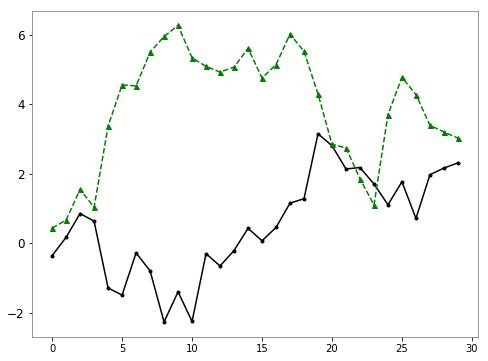

In [23]:
plt.figure(figsize=[8, 6])
plt.plot(np.random.randn(30).cumsum(), 'ko-', markersize=3)
plt.plot(np.random.randn(30).cumsum(),
         color='g',
         linestyle='dashed',
         marker='^',
         markersize=5)
plt.savefig('figpath.svg')
plt.savefig('figpath.png',
            facecolor='w',
            edgecolor='w',
            transparent=True,
            dpi=400,
            bbox_inches='tight')

<a id="Pandas"></a>
# 使用Pandas和seaborn绘图

导入Seaborn会修改默认的Matplotlib配色方案和绘图方案，会提高图表可读性和美观性。

``` Python
Series.plot(kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds)
```

## pandas.Series.plot[方法参数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html)

- label  图例标签
- ax  绘图所用的matplotlib子图对象；如果没有传值，则使用当前活动的matplotlib的子图
- style  传给matplotlib的样式字符串，例如：'ko--'
- alpha  图片不透明度(0-1)
- kind
    - `‘line’` : line plot (default)
    - `‘bar’` : vertical bar plot
    - `‘barh’` : horizontal bar plot
    - `‘hist’` : histogram
    - `‘box’` : boxplot
    - `‘kde’` : Kernel Density Estimation plot
    - `‘density’` : same as ‘kde’
    - `‘area’` : area plot
    - `‘pie’` : pie plot
- logy  y轴上使用对数缩放
- use_index  使用对象索引刻度标签
- rot  刻度标签的旋转(0-360)
- xticks  用于x轴刻度的值
- yticks  用于y轴刻度的值
- xlim  x轴范围
- ylim  y轴范围
- grid  展示轴网格(默认打开)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

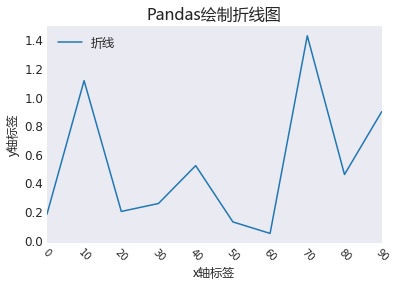

In [25]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
plot = s.plot(kind='line',
              xticks=[x for x in range(0, 100, 10)],
              rot=-45,
              grid=False)
plot.set_title('Pandas绘制折线图', FontProperties=font, fontsize=16)
plot.set_xlabel('x轴标签', FontProperties=font)
plot.set_ylabel('y轴标签', FontProperties=font)
plot.legend(['折线'], prop=font)

## pandas.DataFrame.plot[方法参数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot)

``` Python
DataFrame.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)
```

- subplots  将DataFrame每一列绘制在独立子图中
- sharex  如果设置为`subplots=True`，则共享相同的x轴、范围和刻度
- sharey  如果设置为`subplots=True`，则共享相同的y轴、范围和刻度
- figsize  用于生成图片尺寸的元组或列表
- title  标题字符串
- legned  添加子图图例(默认为True)
- sort_columns  安装字母顺序绘制各列，默认情况下使用已有的列顺序

In [26]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=pd.Index(['a', 'c', 'b', 'd'], name='类别'),
                  index=np.arange(0, 100, 10))
df

类别,a,c,b,d
0,-1.382055,-0.406354,-1.092698,0.636397
10,0.159743,-0.522876,-1.766498,-0.629772
20,0.181173,-0.385179,-1.918661,-1.652218
30,-0.023646,-0.882836,-0.213492,-2.494240
40,-0.467027,-2.042503,-0.731923,-2.471341
50,-0.438296,-0.412897,0.940827,-2.745736
60,-0.985522,1.695416,0.858687,-2.523655
70,-1.802177,0.955192,1.714030,-2.272279
80,-3.781774,1.690241,3.035157,-3.194701
90,-3.590511,3.041185,3.456213,-4.174501


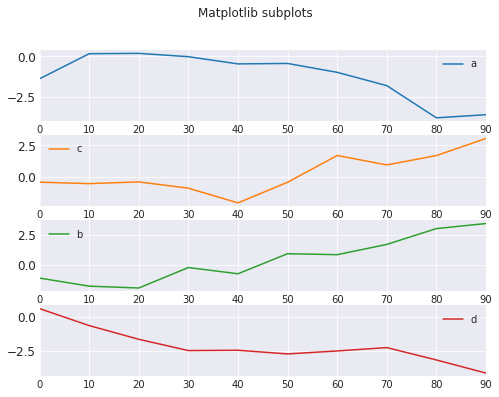

In [27]:
plot = df.plot(kind='line',
               subplots=True,
               sharex=False,
               figsize=[8, 6],
               sort_columns=True,
               legend=True,
               title='Matplotlib subplots')

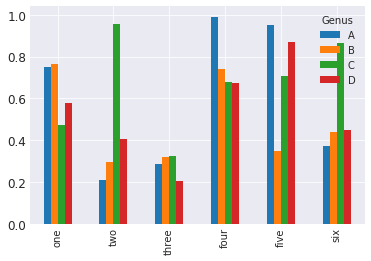

In [28]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()

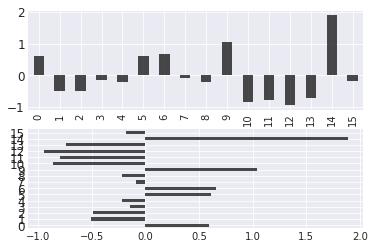

In [29]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.randn(16))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

## 复杂的参数设置

其他参数和axes参数一致

Text(0.5, 1.0, '横轴')

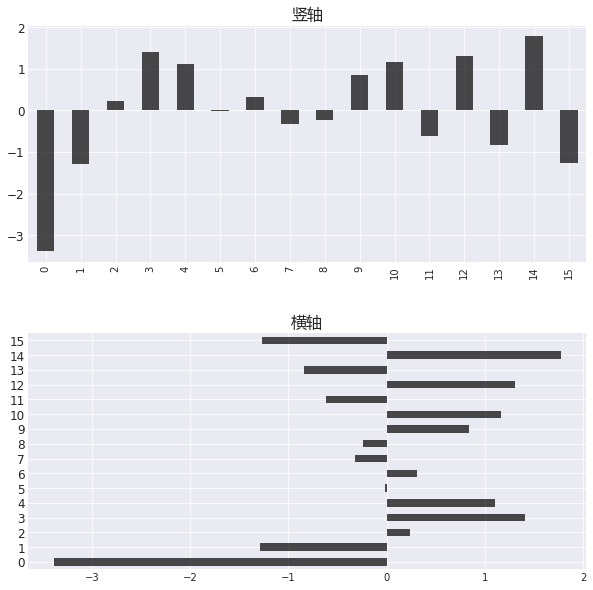

In [30]:
fig, axes = plt.subplots(2, 1, figsize=[10, 10])
plt.subplots_adjust(left=None,
                    bottom=None,
                    right=None,
                    top=None,
                    wspace=1,
                    hspace=0.3)
data = pd.Series(np.random.randn(16))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
axes[0].set_title('竖轴', FontProperties=font, fontsize=16)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)
axes[1].set_title('横轴', FontProperties=font, fontsize=16)

<a id="Pyecharts"></a>
# Pyecharts

**[Pyecharts](https://pyecharts.org/#/zh-cn/intro)**是一个用于生成 Echarts 图表的类库。Echarts 是百度开源的一个数据可视化 JS 库。用 Echarts 生成的图可视化效果非常棒，为了与 Python 进行对接，方便在 Python 中直接使用数据生成图，作者写了这个项目。

**[Github](https://github.com/pyecharts/pyecharts)**

## 链式调用

In [31]:
from pyecharts.charts import Bar
from pyecharts import options as opts

# V1 版本开始支持链式调用
bar = (Bar().add_xaxis(["衬衫", "毛衣", "领带", "裤子", "风衣", "高跟鞋", "袜子"]).add_yaxis(
    "商家A", [114, 55, 27, 101, 125, 27, 105]).add_yaxis(
        "商家B", [57, 134, 137, 129, 145, 60, 49]).set_global_opts(
            title_opts=opts.TitleOpts(title="某商场销售情况")))
bar.render_notebook()

## 单独调用方法

In [32]:
from pyecharts.charts import Bar
from pyecharts import options as opts
# 不习惯链式调用的开发者依旧可以单独调用方法
bar = Bar()
bar.add_xaxis(["衬衫", "毛衣", "领带", "裤子", "风衣", "高跟鞋", "袜子"])
bar.add_yaxis("商家A", [114, 55, 27, 101, 125, 27, 105])
bar.add_yaxis("商家B", [57, 134, 137, 129, 145, 60, 49])
bar.set_global_opts(title_opts=opts.TitleOpts(title="某商场销售情况"))
bar.render('pyecharts.html')  # 生成HTML
bar.render_notebook()  # 在Jupyter Notebook中显示

## 全局配置项
![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.3ybsvaps1p7.png)

## 一页显示多图

In [33]:
from example.commons import Collector, Faker
from pyecharts import options as opts
from pyecharts.charts import Bar, Page, Map


def bar_different_series_gap() -> Bar:
    c = (Bar().add_xaxis(Faker.choose()).add_yaxis(
        "商家A", Faker.values(),
        gap="0%").add_yaxis("商家B", Faker.values(), gap="0%").set_global_opts(
            title_opts=opts.TitleOpts(title="Bar-不同系列柱间距离")))
    return c


def province_map() -> Map:

    c = (
        Map().add("", [z for z in zip(Faker.provinces, Faker.values())],
                  "china").set_series_opts(label_opts=opts.LabelOpts(
                      is_show=True)).set_global_opts(
                          title_opts=opts.TitleOpts(title="好友省级分布(中国地图)"),
                          toolbox_opts=opts.ToolboxOpts(is_show=True),  # 显示功能框
                          visualmap_opts=opts.VisualMapOpts(
                              max_=50 * (max(values) // 50 + 1),
                              is_piecewise=False),  # 分段型
                      ))
    return c


def map_world() -> Map:
    c = (
        Map().add("国家", [z for z in zip(Faker.country, Faker.values())],
                  "world").set_series_opts(label_opts=opts.LabelOpts(
                      is_show=False)).set_global_opts(
                          title_opts=opts.TitleOpts(title="Map-世界地图"),
                          visualmap_opts=opts.VisualMapOpts(
                              max_=200, is_piecewise=True),  # 分段型
                      ))
    return c


provinces = ['广东', '北京', '上海', '江西', '湖南', '浙江', '江苏']
values = [59, 55, 104, 126, 81, 63, 111]

Page().add(bar_different_series_gap(), province_map(),
           map_world()).render('page.html')
Page().add(bar_different_series_gap(), province_map(),
           map_world()).render_notebook()

## 单图示例

### Table-基本示例

In [34]:
from pyecharts.components import Table
from pyecharts.options import ComponentTitleOpts


def table_base() -> Table:
    table = Table()

    headers = ["City name", "Area", "Population", "Annual Rainfall"]
    rows = [
        ["Brisbane", 5905, 1857594, 1146.4],
        ["Adelaide", 1295, 1158259, 600.5],
        ["Darwin", 112, 120900, 1714.7],
        ["Hobart", 1357, 205556, 619.5],
        ["Sydney", 2058, 4336374, 1214.8],
        ["Melbourne", 1566, 3806092, 646.9],
        ["Perth", 5386, 1554769, 869.4],
    ]
    table.add(headers, rows).set_global_opts(title_opts=ComponentTitleOpts(
        title="Table-基本示例", subtitle="我是副标题支持换行哦"))
    return table


table_base().render_notebook()

City name,Area,Population,Annual Rainfall
Brisbane,5905,1857594,1146.4
Adelaide,1295,1158259,600.5
Darwin,112,120900,1714.7
Hobart,1357,205556,619.5
Sydney,2058,4336374,1214.8
Melbourne,1566,3806092,646.9
Perth,5386,1554769,869.4


### BoxPlot-基本示例

In [35]:
from pyecharts.charts import Boxplot


def boxpolt_base() -> Boxplot:
    v1 = [
        [850, 740, 900, 1070, 930, 850, 950, 980, 980, 880, 1000, 980],
        [960, 940, 960, 940, 880, 800, 850, 880, 900, 840, 830, 790],
    ]
    v2 = [
        [890, 810, 810, 820, 800, 770, 760, 740, 750, 760, 910, 920],
        [890, 840, 780, 810, 760, 810, 790, 810, 820, 850, 870, 870],
    ]
    c = Boxplot()
    c.add_xaxis(["expr1",
                 "expr2"]).add_yaxis("A", c.prepare_data(v1)).add_yaxis(
                     "B", c.prepare_data(v2)).set_global_opts(
                         title_opts=opts.TitleOpts(title="BoxPlot-基本示例"))
    return c


boxpolt_base().render_notebook()

### WordCloud-基本示例

In [36]:
from example.commons import Collector, Faker
from pyecharts import options as opts
from pyecharts.charts import Bar, Page, WordCloud
from pyecharts.globals import SymbolType

words = [
    ("Sam S Club", 10000),
    ("Macys", 6181),
    ("Amy Schumer", 4386),
    ("Jurassic World", 4055),
    ("Charter Communications", 2467),
    ("Chick Fil A", 2244),
    ("Planet Fitness", 1868),
    ("Pitch Perfect", 1484),
    ("Express", 1112),
    ("Home", 865),
    ("Johnny Depp", 847),
    ("Lena Dunham", 582),
    ("Lewis Hamilton", 555),
    ("KXAN", 550),
    ("Mary Ellen Mark", 462),
    ("Farrah Abraham", 366),
    ("Rita Ora", 360),
    ("Serena Williams", 282),
    ("NCAA baseball tournament", 273),
    ("Point Break", 265),
]


def wordcloud_base() -> WordCloud:
    c = (WordCloud().add("", words, word_size_range=[
        20, 100
    ]).set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-基本示例")))
    return c


def wordcloud_diamond() -> WordCloud:
    c = (WordCloud().add(
        "", words, word_size_range=[20, 100],
        shape=SymbolType.DIAMOND).set_global_opts(title_opts=opts.TitleOpts(
            title="WordCloud-shape-diamond")))
    return c


Page().add(wordcloud_base(), wordcloud_diamond()).render_notebook()

## 直接编写 JavaScript

In [37]:
%%javascript
element.append('<div id="nest_chart" style="min-width: 310px; height: 400px; margin: 0 auto"></div>');
(function(element) {
    requirejs(['echarts'], function(echarts) {
        var option = {
            title: {
                text: '直接编写 JavaScript'
            },
            tooltip: {},
            legend: {
                data:['销量']
            },
            xAxis: {
                data: ["衬衫","羊毛衫","雪纺衫","裤子","高跟鞋","袜子"]
            },
            yAxis: {},
            series: [{
                name: '销量',
                type: 'bar',
                data: [5, 20, 36, 10, 10, 20]
            }]
        };

        var myChart = echarts.init(document.getElementById('nest_chart'));
        myChart.setOption(option);
        return {};
    });
})(element);

<IPython.core.display.Javascript object>

其他例子请参考[Github examples](https://github.com/pyecharts/pyecharts/tree/master/example)。

<a id="Plotly"></a>
# Plotly

In [38]:
# pip install plotly

您需要用您的Plotly用户名和应用编程接口密钥替换“DemoAccount”和“lr1c37zw81”。 

在此找到你的[API key](https://plot.ly/settings/api#/)。

In [39]:
import plotly
plotly.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')
plotly.tools.set_credentials_file(username='hufe09',
                                  api_key='q21ZJcUYFSGcsLoKBDHf')

Plot可以设置为三种不同类型的隐私:public, private 或 secret.

In [40]:
import plotly
plotly.tools.set_config_file(world_readable=True, sharing='public')

## Plotly开始在线绘图

- 使用py.plot()返回唯一的url，并可选地打开该url。
- 在Jupyter Notebook中工作时，使用py.iplot()在notebook中显示绘图。

In [41]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = [trace0, trace1]

py.plot(data, filename = 'basic-line', auto_open=True)

'https://plot.ly/~hufe09/53'

In [42]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = [trace0, trace1]

py.iplot(data, filename = 'basic-line')

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



获取更多信息：

In [43]:
import plotly.plotly as py
help(py.iplot)

Help on function iplot in module chart_studio.plotly.plotly:

iplot(figure_or_data, **plot_options)
    Create a unique url for this plot in Plotly and open in IPython.
    
    plot_options keyword arguments:
    filename (string) -- the name that will be associated with this figure
    fileopt ('new' | 'overwrite' | 'extend' | 'append')
        - 'new': create a new, unique url for this plot
        - 'overwrite': overwrite the file associated with `filename` with this
        - 'extend': add additional numbers (data) to existing traces
        - 'append': add additional traces to existing data lists
    sharing ('public' | 'private' | 'secret') -- Toggle who can view this graph
        - 'public': Anyone can view this graph. It will appear in your profile
                    and can appear in search engines. You do not need to be
                    logged in to Plotly to view this chart.
        - 'private': Only you can view this plot. It will not appear in the
                   

## Plotly离线绘图的初始化

- 使用`plotly.offline.plot()`创建并独立保存在本地并在您的网络浏览器中打开的超文本标记语言。
- 在Jupyter Notebook中脱机工作时，使用`plot.offline.iplot()`在notebook中显示绘图。

In [44]:
import plotly
import plotly.graph_objs as go

plotly.offline.plot({
    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": go.Layout(title="hello world")
}, auto_open=True)

'temp-plot.html'

In [45]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": go.Layout(title="hello world")
})

## Ｐlotly与Pandas一起使用

In [46]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv(
    'https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv'
)

fig = {
    'data': [
        {
            'x': df.gdpPercap,
            'y': df.lifeExp,
            'text': df.country,
            'mode': 'markers',
            'name': '2007'
        },
    ],
    'layout': {
        'xaxis': {
            'title': 'GDP per Capita',
            'type': 'log'
        },
        'yaxis': {
            'title': "Life Expectancy"
        }
    }
}

py.iplot(fig, filename='pandas-multiple-scatter')

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [47]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
from datetime import datetime

df = pd.read_csv(
    'https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv'
)
data = [go.Scatter(x=df.Date, y=df['AAPL.High'])]

py.iplot(data, filename='time-series-simple')

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



<a id="Cufflinks"></a>
# Cufflinks

**Cufflinks**把[plotly](http://www.plot.ly) 的力量和[pandas](http://pandas.pydata.org/)的灵活性结合在一起，便于绘图。

Github地址[santosjorge/cufflinks](https://github.com/santosjorge/cufflinks)

 使用[Plotly and Cufflinks](https://nbviewer.jupyter.org/gist/santosjorge/aba934a0d20023a136c2)实现与[Pandas可视化](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)对等的效果


In [48]:
# !pip install plotly # Plotly是cufflinks依赖包
# !pip install cufflinks

In [49]:
import cufflinks as cf

In [50]:
%reload_ext autoreload
%autoreload 2

将所有图表设为public，设置为离线模式，并设定全局主题

In [51]:
#We set the all charts as public
import plotly.offline
# Offline mode
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True, theme='pearl')

In [52]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [53]:
import plotly.plotly as py
df = cf.datagen.lines()

py.iplot([{
    'x': df.index,
    'y': df[col],
    'name': col
} for col in df.columns],
         filename='simple-line')

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [54]:
help(df.iplot)

Help on method _iplot in module cufflinks.plotlytools:

_iplot(kind='scatter', data=None, layout=None, filename='', sharing=None, title='', xTitle='', yTitle='', zTitle='', theme=None, colors=None, colorscale=None, fill=False, width=None, dash='solid', mode='', interpolation='linear', symbol='circle', size=12, barmode='', sortbars=False, bargap=None, bargroupgap=None, bins=None, histnorm='', histfunc='count', orientation='v', boxpoints=False, annotations=None, keys=False, bestfit=False, bestfit_colors=None, mean=False, mean_colors=None, categories='', x='', y='', z='', text='', gridcolor=None, zerolinecolor=None, margin=None, labels=None, values=None, secondary_y='', secondary_y_title='', subplots=False, shape=None, error_x=None, error_y=None, error_type='data', locations=None, lon=None, lat=None, asFrame=False, asDates=False, asFigure=False, asImage=False, dimensions=None, asPlot=False, asUrl=False, online=None, **kwargs) method of pandas.core.frame.DataFrame instance
           Retur

## Line Chart

In [55]:
cf.datagen.lines().iplot(kind='scatter',
                         xTitle='Dates',
                         yTitle='Returns',
                         title='Cufflinks - Line Chart')

In [56]:
cf.datagen.lines(3).iplot(kind='scatter',
                          xTitle='Dates',
                          yTitle='Returns',
                          title='Cufflinks - Filled Line Chart',
                          colorscale='-blues',
                          fill=True)

In [57]:
cf.datagen.lines(1).iplot(kind='scatter',
                          xTitle='Dates',
                          yTitle='Returns',
                          title='Cufflinks - Besfit Line Chart',
                          filename='Cufflinks - Bestfit Line Chart',
                          bestfit=True,
                          colors=['blue'],
                          bestfit_colors=['pink'])

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



## Scatter Chart

In [58]:
cf.datagen.lines(2).iplot(kind='scatter',
                          mode='markers',
                          size=10,
                          symbol='x',
                          colorscale='paired',
                          xTitle='Dates',
                          yTitle='EPS Growth',
                          title='Cufflinks - Scatter Chart')

## Spread Chart

In [59]:
cf.datagen.lines(2).iplot(kind='spread',
                          xTitle='Dates',
                          yTitle='Return',
                          title='Cufflinks - Spread Chart')

## Bar Chart

In [60]:
cf.datagen.lines(5).iplot(kind='bar',
                          xTitle='Dates',
                          yTitle='Return',
                          title='Cufflinks - Bar Chart')

In [61]:
cf.datagen.lines(5).iplot(kind='bar',
                          xTitle='Dates',
                          yTitle='Return',
                          title='Cufflinks - Grouped Bar Chart',
                          barmode='stack')

## Box Plot

In [62]:
cf.datagen.box(6).iplot(kind='box',
                        xTitle='Stocks',
                        yTitle='Returns Distribution',
                        title='Cufflinks - Box Plot')

## Historgram

- `barmode (overlay | group | stack)`

- `bins (int)`

- `histnorm ('' | 'percent' | 'probability' | 'density' | 'probability density')`

- `histfunc ('count' | 'sum' | 'avg' | 'min' | 'max')`

In [63]:
cf.datagen.histogram(2).iplot(kind='histogram',
                              opacity=.75,
                              title='Cufflinks - Histogram')

In [64]:
cf.datagen.histogram(2).iplot(kind='histogram',
                              barmode='stack',
                              bins=100,
                              histnorm='percent',
                              filename='customized-histogram')

## Heatmap Plot

In [65]:
cf.datagen.heatmap(20, 20).iplot(kind='heatmap',
                                 colorscale='spectral',
                                 title='Cufflinks - Heatmap')

## Bubble Chart

In [66]:
cf.datagen.bubble(prefix='industry').iplot(kind='bubble',
                                           x='x',
                                           y='y',
                                           size='size',
                                           categories='categories',
                                           text='text',
                                           xTitle='Returns',
                                           yTitle='Analyst Score',
                                           title='Cufflinks - Bubble Chart')

## Scatter 3D

In [67]:
cf.datagen.scatter3d(2, 150).iplot(kind='scatter3d',
                                   x='x',
                                   y='y',
                                   z='z',
                                   size=15,
                                   categories='categories',
                                   text='text',
                                   title='Cufflinks - Scatter 3D Chart',
                                   colors=['blue', 'pink'],
                                   width=0.5,
                                   margin=(0, 0, 0, 0),
                                   opacity=1)

## Bubble 3D 

In [68]:
cf.datagen.bubble3d(5, 4).iplot(kind='bubble3d',
                                x='x',
                                y='y',
                                z='z',
                                size='size',
                                text='text',
                                categories='categories',
                                title='Cufflinks - Bubble 3D Chart',
                                colorscale='set1',
                                width=.5,
                                opacity=.9)

## Surface

In [69]:
cf.datagen.sinwave(10, .25).iplot(kind='surface',
                                  theme='solar',
                                  colorscale='brbg',
                                  title='Cufflinks - Surface Plot',
                                  margin=(0, 0, 0, 0))

/opt/conda/lib/python3.7/site-packages/cufflinks/datagen.py:380: RuntimeWarning:

invalid value encountered in true_divide



# 总结

介绍了几种Python常用的数据可视化库。
<li><a href="#Matplotlib" >Matplotlib</a></li>
<li><a href="#Pandas" >Pandas和seaborn</a></li>
<li><a href="#Pyecharts" >Pyecharts</a></li>
<li><a href="#Plotly" >Plotly</a></li>
<li><a href="#Cufflinks" >Cufflinks</a></li>

<h5><a href="#top" >Back to Top</a></h5>
<h5><a href="https://hufe09.github.io/archive/?tag=Data+Visualization">Hufe Blog</a><h5>